In [44]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b6833aa441ff48f38190bb9288e107bc = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Wllsw6wZkfYTYMl68NUI6jrwvioFccUGTbllx8Q3Dg4S',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_b6833aa441ff48f38190bb9288e107bc.get_object(Bucket='diabeticspredictionsystembasedonl-donotdelete-pr-9mqlylgk0uc6mi',Key='diabetes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Importing the library

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### some information about data

In [46]:
df_data_1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df_data_1.shape

(768, 9)

In [5]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df_data_1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
dia=len(df_data_1.loc[df_data_1["Outcome"]==1])
non_dia =len(df_data_1.loc[df_data_1["Outcome"]==0])
print("number of person having Diabeties :",dia)
print("number of person not having Diabeties :",non_dia)

number of person having Diabeties : 268
number of person not having Diabeties : 500


## Data Visualisation

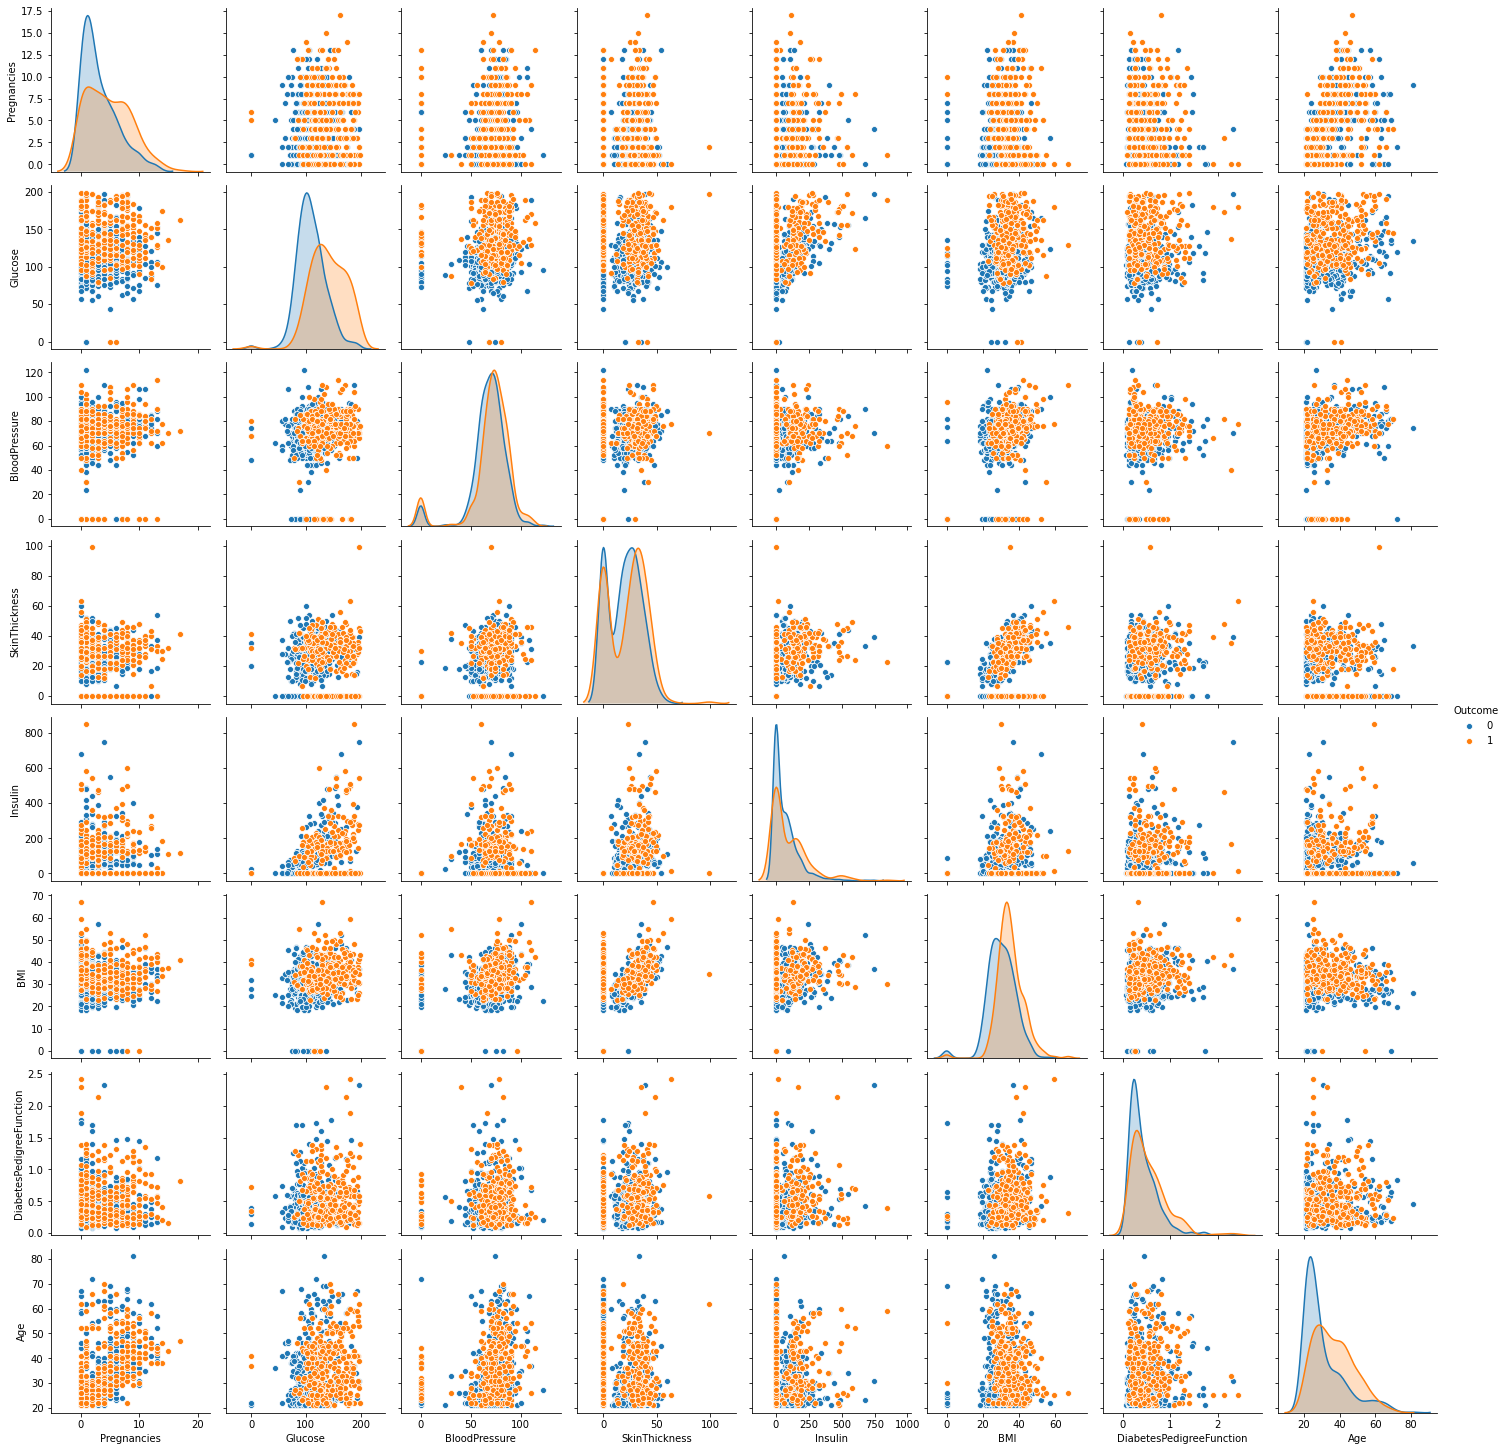

In [8]:
sns.pairplot(data=df_data_1,hue="Outcome")

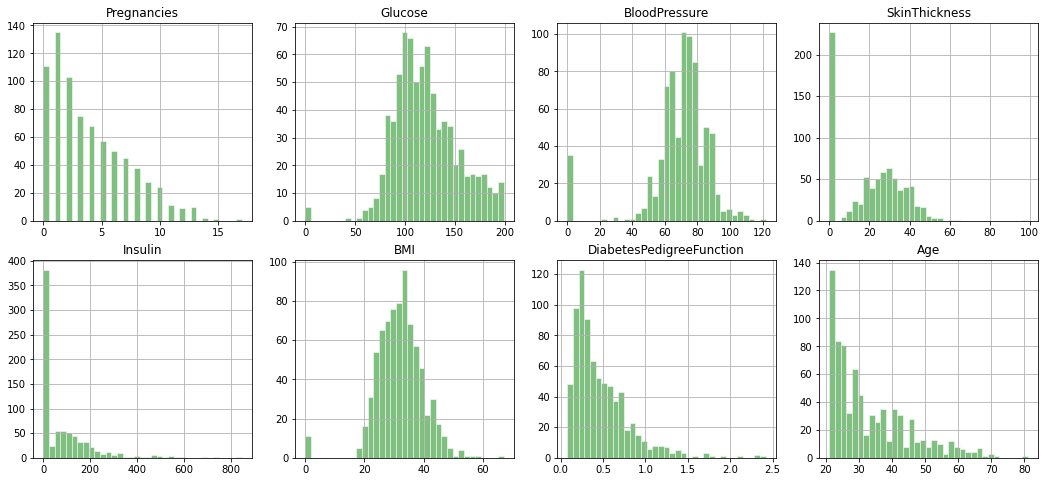

In [9]:
#distribution of the features
R,C= 2,4
fig,ax =plt.subplots(nrows=2, ncols=4, figsize=(18,8))
sns.set_style('whitegrid')
colu = df_data_1.columns
row,col=0,0
for i, feature in enumerate(colu[:8]):
    if col == C-1:
        row= row+1
    col = i%C
    df_data_1[feature].hist(bins=35,color="green",alpha=0.5,ax=ax[row,col]).set_title(feature)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your 

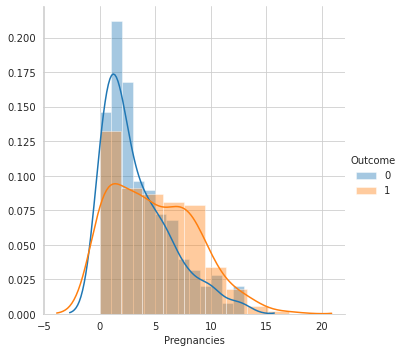

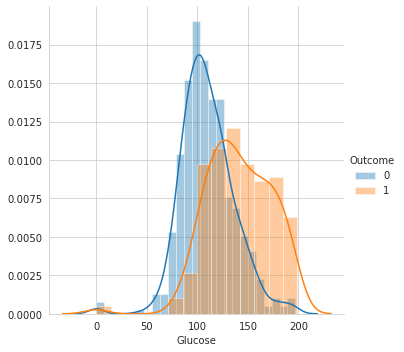

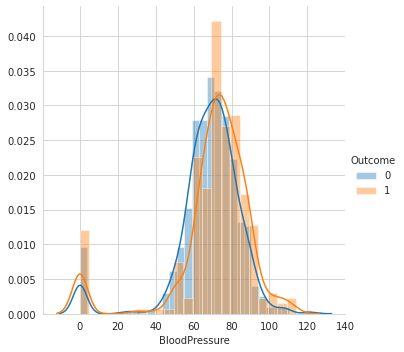

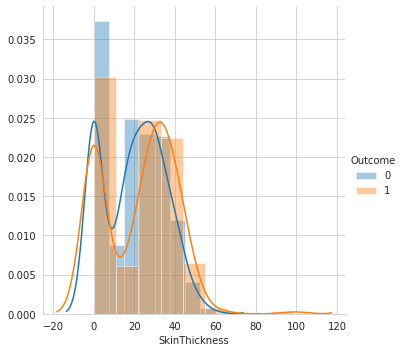

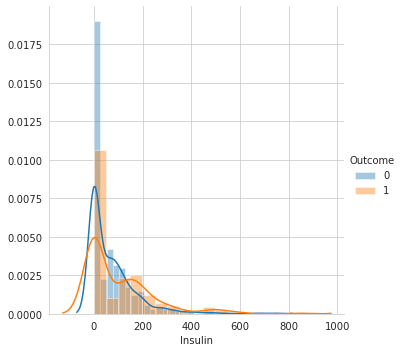

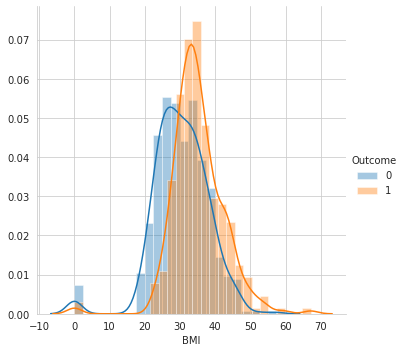

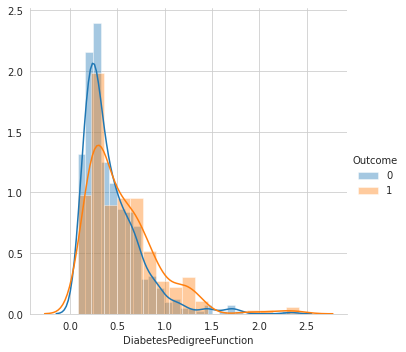

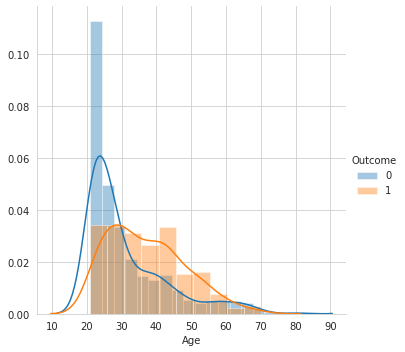

In [10]:
#distribution with the target varibles
sns.set_style('whitegrid')
col = df_data_1.columns
index=0
for i in range(4):
    for j in range(2):
        sns.FacetGrid(df_data_1,hue='Outcome',size=5).map(sns.distplot,col[index]).add_legend()
        index=index+1

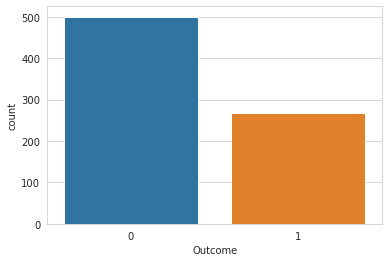

In [11]:
# count plot for number of data in target variable
sns.countplot(x='Outcome',data=df_data_1)

## Coorelation between all features

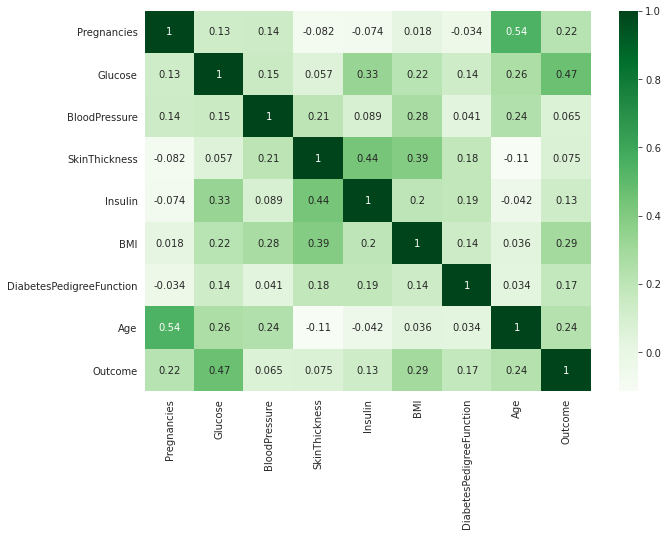

In [12]:
fig= plt.figure(figsize=(10,7))
sns.heatmap(data=df_data_1.corr(),cmap="Greens",annot=True)

## Coorelation of  the target feature with other features

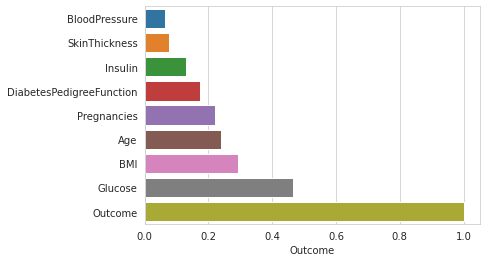

In [13]:
c=pd.DataFrame(df_data_1.corr()['Outcome'])
c=c.sort_values(['Outcome'],ascending=True)
sns.barplot(y=c.index,x=c['Outcome'])

## Working on missing(zero) values in data

In [47]:
print("total number of row",len(df_data_1))
print("number of rows missing Pregnancies :",len(df_data_1.loc[df_data_1["Pregnancies"]==0]))
print("number of rows missing glucose :",len(df_data_1.loc[df_data_1["Glucose"]==0]))
print("number of rows missing in BloodPressure:",len(df_data_1.loc[df_data_1["BloodPressure"]==0]))
print("number of rows missing in SkinThickness :",len(df_data_1.loc[df_data_1["SkinThickness"]==0]))
print("number of rows missing in Insulin :",len(df_data_1.loc[df_data_1["Insulin"]==0]))
print("number of rows missing in BMI :",len(df_data_1.loc[df_data_1["BMI"]==0]))
print("number of rows missing in DiabetesPedigreeFunction :",len(df_data_1.loc[df_data_1["DiabetesPedigreeFunction"]==0]))
print("number of rows missing in Age :",len(df_data_1.loc[df_data_1["Age"]==0]))

total number of row 768
number of rows missing Pregnancies : 111
number of rows missing glucose : 5
number of rows missing in BloodPressure: 35
number of rows missing in SkinThickness : 227
number of rows missing in Insulin : 374
number of rows missing in BMI : 11
number of rows missing in DiabetesPedigreeFunction : 0
number of rows missing in Age : 0


In [48]:
#for missing value we import the library SimpleImputer
from sklearn.impute import SimpleImputer
df=df_data_1
missing=SimpleImputer(missing_values=0,strategy="mean")
df_data_1= missing.fit_transform(df_data_1)

### Feature Scaling

In [49]:
l=[]
for i in range(0,8):
    l1=[]
    for j in range(768):
        m=max(df_data_1[:,i])
        mi=min(df_data_1[:,i])
        f=(df_data_1[j,i]-mi)/(m-mi)
        l1.append(f)
    l.append(l1)
df2= pd.DataFrame([l[0],l[1],l[2],l[3],l[4],l[5],l[6],l[7]], index= df.columns[:8])
df2= df2.transpose()
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.312500,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333
1,0.000000,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667
2,0.437500,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333
3,0.000000,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.218417,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


### Divide our data into input and target variables

In [54]:
x=df2
y=df["Outcome"]

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Splitting data into train and test data

In [57]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=df["Outcome"])

### Distribution of train and test data based on target variable

In [58]:
Train_dia=len(y_train[y_train[:]==1])
Train_non_dia =len(y_train[y_train[:]==0])
Test_dia=len(y_test[y_test[:]==1])
Test_non_dia =len(y_test[y_test[:]==0])
print("number of person having Diabeties :",dia)
print("number of person not having Diabeties :",non_dia)
print("number of person having Diabeties in training dataset :",Train_dia)
print("number of person not having Diabeties in training dataset :",Train_non_dia)
print("number of person having Diabeties in testing dataset:",Test_dia)
print("number of person not having Diabeties in testing dataset :",Test_non_dia)

number of person having Diabeties : 268
number of person not having Diabeties : 500
number of person having Diabeties in training dataset : 214
number of person not having Diabeties in training dataset : 400
number of person having Diabeties in testing dataset: 54
number of person not having Diabeties in testing dataset : 100


## Train the model using Classification Algorithm

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
c_space= np.logspace(-5,8,15)
param_grid= {'C': c_space}
model=LogisticRegression()
log= GridSearchCV(model, param_grid, cv=5)
log.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [60]:
y_pred=log.predict(X_test)
y_pred_t= log.predict(X_train)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

### Evaluating our model

In [61]:
print("score for test data :",log.score(X_test,y_test))
print("score for train data :",log.score(X_train,y_train))

score for test data : 0.7922077922077922
score for train data : 0.7638436482084691


In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix,classification_report

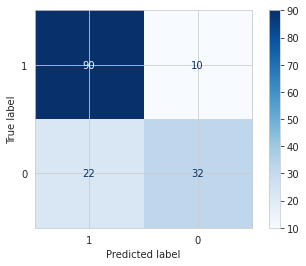

In [63]:
plot_confusion_matrix(log,X_test,y_test,display_labels=y.unique(),cmap=plt.cm.Blues)

In [64]:
print("accuracy score for test data is ",accuracy_score(y_test,y_pred))
print("accuracy score for train data is ",accuracy_score(y_train,y_pred_t))

accuracy score for test data is  0.7922077922077922
accuracy score for train data is  0.7638436482084691


In [65]:
print("classification report for test data :\n" ,classification_report(y_test,y_pred))

classification report for test data :
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       100
           1       0.76      0.59      0.67        54

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



In [66]:
print("classification report for train data :\n",classification_report(y_train,y_pred_t))

classification report for train data :
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       400
           1       0.71      0.54      0.62       214

    accuracy                           0.76       614
   macro avg       0.75      0.71      0.72       614
weighted avg       0.76      0.76      0.75       614



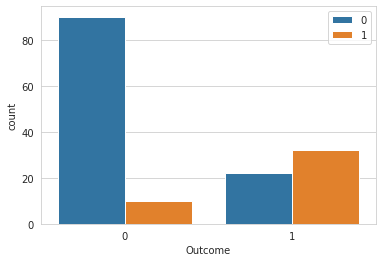

In [67]:
sns.countplot(y_test,hue=y_pred)

### Create a pipeline of our model

In [71]:
X=df.iloc[:,:8]
Y=df["Outcome"]
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.20,stratify=df["Outcome"])

In [72]:
model_pipeline = Pipeline(steps=[("missig_value",SimpleImputer(missing_values=0,strategy="mean")),
                                ('scale_data', StandardScaler()),
                                ("model",GridSearchCV(LogisticRegression(), param_grid, cv=5))])

In [73]:
model_pipeline.fit(train_X,train_Y)

Pipeline(steps=[('missig_value', SimpleImputer(missing_values=0)),
                ('scale_data', StandardScaler()),
                ('model',
                 GridSearchCV(cv=5, estimator=LogisticRegression(),
                              param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])}))])

In [75]:
model_pipeline.score(test_X,test_Y)

0.7792207792207793

In [76]:
model_pipeline.predict(test_X)

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

### Deploy our model

In [82]:
from ibm_watson_machine_learning import APIClient

In [83]:
wml_credentials = {
    "url" : "https://eu-gb.ml.cloud.ibm.com",
    "apikey" : "YDlGfMnJg7rTYE4Jb2dU-iWehyDzScLOoAqdsPlhBsk1"
}

In [84]:
client = APIClient(wml_credentials)

In [85]:
metadata = {
    client.spaces.ConfigurationMetaNames.NAME:"Predicted Diabetes",
    client.spaces.ConfigurationMetaNames.DESCRIPTION:"To predict the person having diabetes or not.",
    client.spaces.ConfigurationMetaNames.STORAGE:{
        "type":"bmcos_object_storage",
        "resource_crn":"crn:v1:bluemix:public:cloud-object-storage:global:a/61e257b443bc4924978837c4f68dea99:b6833aa4-41ff-48f3-8190-bb9288e107bc::"
    },
    client.spaces.ConfigurationMetaNames.COMPUTE:{
        "name":"Machine Learning-yl",
        "crn":"crn:v1:bluemix:public:pm-20:eu-gb:a/61e257b443bc4924978837c4f68dea99:f6c6bd04-b97e-4767-b641-fbec4969f50c::"
    }
}

In [86]:
space_details= client.spaces.store(meta_props=metadata)

Space has been created. However some background setup activities might still be on-going. Check for 'status' field in the response. It has to show 'active' before space can be used. If its not 'active', you can monitor the state with a call to spaces.get_details(space_id)


In [87]:
space_id = space_details['metadata']['id']

In [88]:
client.set.default_space(space_id)

'SUCCESS'

In [89]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029a-cc97-56da-b8e0-39c3880dbbe7  base
tensorflow_2.1-py3.6           1eb25b8

In [90]:
import sklearn
sklearn.__version__

'0.23.1'

In [91]:
spec_id = client.software_specifications.get_id_by_name('scikit-learn_0.22-py3.6')

In [92]:
model_details = client.repository.store_model(model=model_pipeline, meta_props={
    client.repository.ModelMetaNames.NAME:"Predicted Diabetes",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:spec_id,
    client.repository.ModelMetaNames.TYPE:"scikit-learn_0.22"
})

In [93]:
model_id = model_details['metadata']['id']

In [94]:
metadata = {
    client.deployments.ConfigurationMetaNames.NAME:"Predicted Diabetes",
    client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [95]:
deployment_details = client.deployments.create(artifact_uid = model_id,meta_props=metadata)



#######################################################################################

Synchronous deployment creation for uid: '1b163cec-0e69-44b4-87e8-2e2e3284e597' started

#######################################################################################


initializing.
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='1e9e8f62-252c-462e-a19f-416a75566582'
------------------------------------------------------------------------------------------------




In [96]:
deployment_id = deployment_details['metadata']['id']

In [107]:
payload = {
    client.deployments.ScoringMetaNames.INPUT_DATA:[{
       "fields":['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],
        "values":[[0,137,40,35,168,43.1,2.288,33]]
   }]
}

In [108]:
client.deployments.score(deployment_id=deployment_id,meta_props=payload).values()

dict_values([[{'fields': ['prediction', 'probability'], 'values': [[1, [0.11869983033775444, 0.8813001696622456]]]}]])